In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data
import datetime
import os
import sys
import prepare as p

home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')

import wrangle_utils as wu
import explore_utils as eu
import model_utils as mu
import env

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')
df.head()

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [4]:
df = p.acquire_sales_data()

In [5]:
df.head()

,store_id,item_id,sale_id,date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [6]:
df = p.date_set_index(df, col='date')
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
date,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,1,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,1,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [7]:
df = p.add_month_year(df)

In [8]:
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,year
date,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,2013
2013-01-02,1,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,2013
2013-01-03,1,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,2013
2013-01-04,1,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,2013
2013-01-05,1,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,2013


In [10]:
df['total_sales'] = df['sale_amount'] * df['item_price']

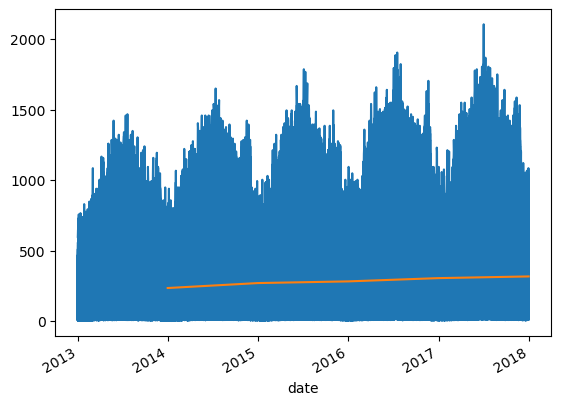

In [18]:
# Plot total sales over time
plt.plot(df.index, df.total_sales)
plt.show()

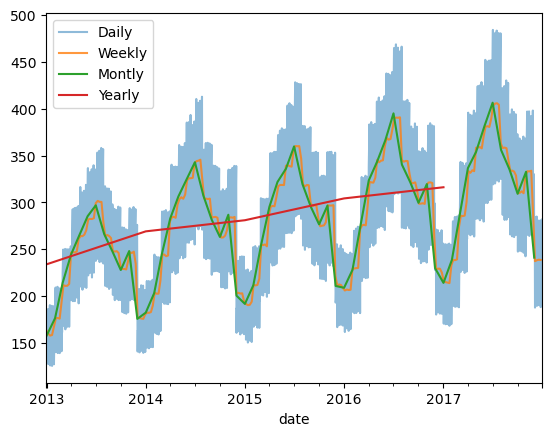

In [120]:
# Sales trends across day, week, month, and year timescales

df.resample("D").agg('mean').total_sales.plot(alpha=.5, label='Daily')
df.resample("W").agg('mean').total_sales.plot(alpha=.8, label='Weekly')
df.resample("M").agg('mean').total_sales.plot(label='Montly')
df.resample("Y").agg('mean').total_sales.plot(label='Yearly')
plt.legend();

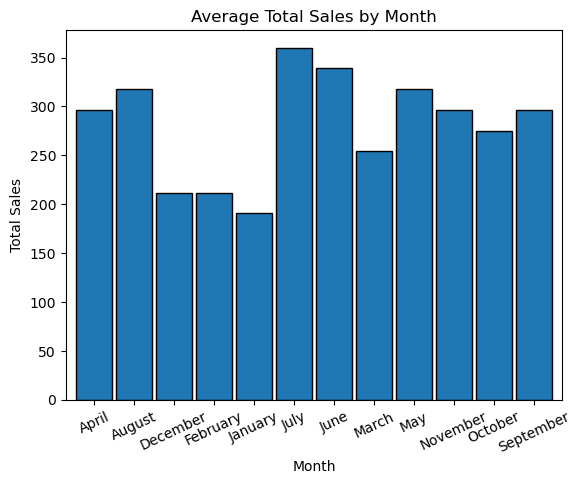

In [119]:
# Average sales by monthb

ax = df.groupby(df.month).mean().total_sales.plot.bar(width=.9, ec='black')
plt.xticks(rotation=25)
ax.set(title='Average Total Sales by Month', xlabel='Month', ylabel='Total Sales');


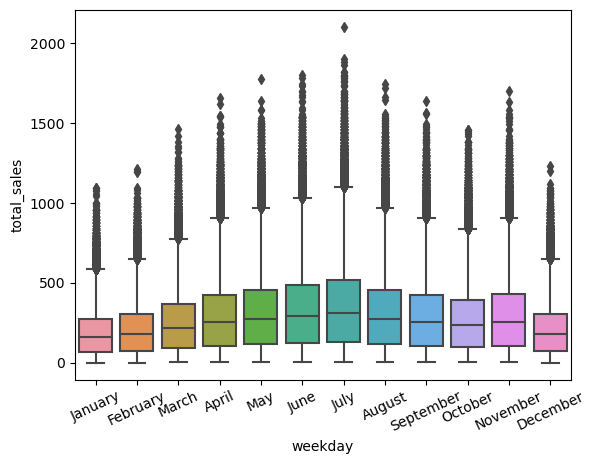

In [44]:
# Daily distribution of sales
df.assign(weekday=lambda df: df.index.month_name()).pipe((sns.boxplot, 'data'), y='total_sales', x='weekday');
plt.xticks(rotation=25);

<Axes: xlabel='weekday', ylabel='total_sales'>

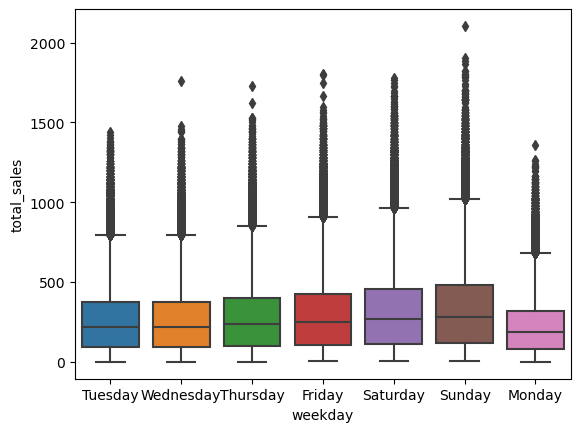

In [36]:
# Daily distribution of sales
df.assign(weekday=lambda df: df.index.day_name()).pipe((sns.boxplot, 'data'), y='total_sales', x='weekday')

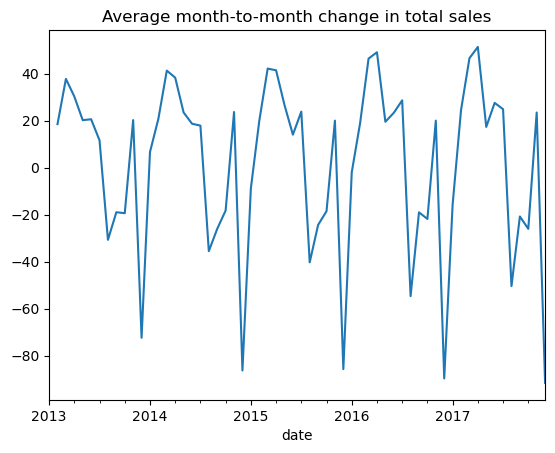

In [46]:
# Average change in total sales
df.resample('M').mean().total_sales.diff().plot(title='Average month-to-month change in total sales');

<Axes: title={'center': 'Seasonal Plot'}, xlabel='date'>

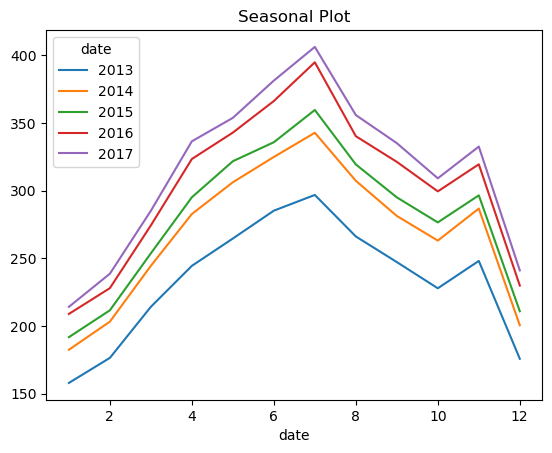

In [48]:
# .unstack turns an index level into columns
df.groupby([df.index.year, df.index.month]).mean().unstack(0).total_sales.plot(title='Seasonal Plot')

In [72]:
display(df.groupby(df.index.year).agg('sum').total_sales.diff())
avg_growth = df.groupby(df.index.year).agg('sum').total_sales.diff().mean()
print(f'On average, total sales grows by ${avg_growth:,.0f} every year')

date
2013           NaN
2014    6413897.99
2015    2164514.87
2016    4397373.05
2017    2022369.62
Name: total_sales, dtype: float64

On average, total sales grows by $3,749,539 every year


In [65]:
pd.DataFrame(df.resample("Y").sum().total_sales)

,total_sales
date,
2013-12-31,42698882.56
2014-12-31,49112780.55
2015-12-31,51277295.42
2016-12-31,55674668.47
2017-12-31,57697038.09


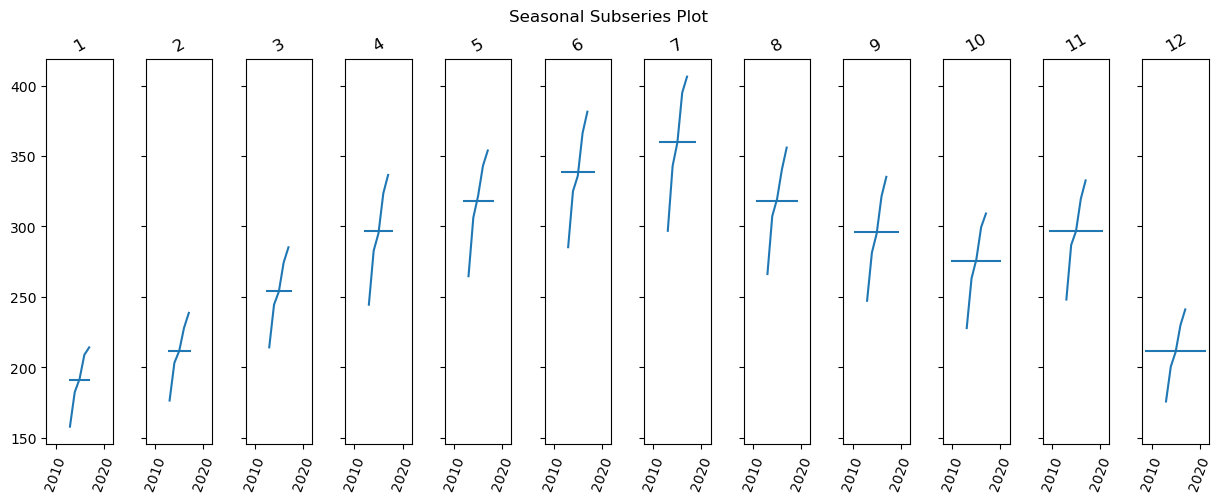

In [90]:
# Create the table with the mean total_sales for each year and month
table = df.groupby([df.year, df.month]).mean().total_sales.unstack(0)

# Convert the month names to numeric values (1 to 12)
table.index = pd.to_datetime(table.index, format='%B').month

# Sort the table by month
table = table.sort_index()

# Create the subplots
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(15, 5))  # Adjust figsize as needed

for ax, (month, subset) in zip(axs, table.iterrows()):
    subset.plot(ax=ax)
    ax.set_title(month, rotation=30)  # Set the title with the month name (January to December)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.set_xticklabels([int(x) for x in ax.get_xticks()], rotation=70)

fig.suptitle('Seasonal Subseries Plot')  # Super-title for the overall figure
fig.subplots_adjust(wspace=0.5)  # Adjust the horizontal space between subplots
plt.show()


<Axes: xlabel='this_week', ylabel='next_week'>

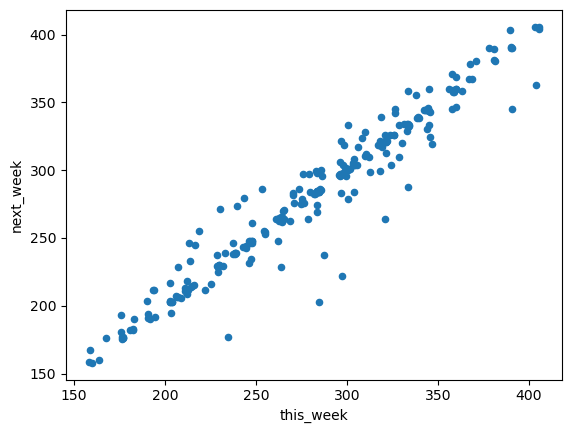

In [118]:
# Autocorrelation by week
weekly = df.reset_index()[['date','total_sales']]
weekly.index = pd.to_datetime(weekly['date'])
weekly = weekly.resample('W').mean()
weekly['next_week'] = weekly.total_sales.shift(-1)
weekly = weekly.rename(columns={'total_sales': 'this_week'})
weekly.plot.scatter(x='this_week', y='next_week')

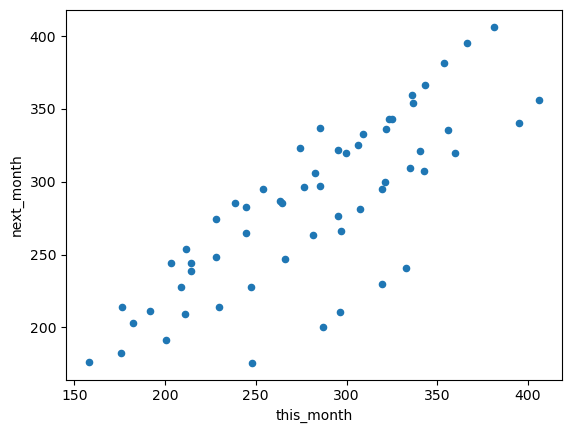

In [117]:
# Autocorrelation by month
monthly = df.reset_index()[['date','total_sales']]
monthly.index = pd.to_datetime(monthly['date'])
monthly = monthly.resample('M').mean()
monthly['next_month'] = monthly.total_sales.shift(-1)
monthly = monthly.rename(columns={'total_sales': 'this_month'})
monthly.plot.scatter(x='this_month', y='next_month');

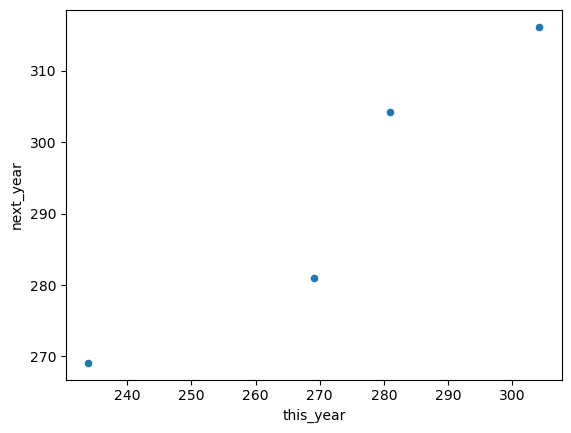

In [115]:
# Autocorrelation by year
yearly = df.reset_index()[['date','total_sales']]
yearly.index = pd.to_datetime(yearly['date'])
yearly = yearly.resample('Y').mean()
yearly['next_year'] = yearly.total_sales.shift(-1)
yearly = yearly.rename(columns={'total_sales': 'this_year'})
yearly.plot.scatter(x='this_year', y='next_year');

In [ ]:
def autocorrelation(df):
    weekly = df.reset_index()[['date','total_sales']]
    weekly.index = pd.to_datetime(weekly['date'])
    weekly = weekly.resample('W').mean()
    weekly['next_week'] = weekly.total_sales.shift(-1)
    weekly = weekly.rename(columns={'total_sales': 'this_week'})
    weekly.plot.scatter(x='this_week', y='next_week')